### Cleaning, tidying and re-arranging your data

It is very rare for a dataset to be in the exact format you'd like, with just the data you want and no errors.  Much of the work in data analysis is producing a tidy dataset ready to work with.  80% of data analysis is spent on the process of cleaning and preparing the data (Dasu and Johnson 2003).  In this week's classes you will learn about:  

Adding/removing columns  
Combining columns  
Filtering data - by rows, columns  
Transforming data - operations over series  
Tidy data
Changing form of data - melt, pivot  

Before class  watch the video about tidy data.
In Class 3 you will learn about tidy data and more advanced ways of manipulating data into useful forms.
In Class 4 you'll practise these processes on a dataset of your choice.  

In [2]:
# Analysis modules
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

### Introduction - basic changes

Let's add a couple of columns to last week's dataframe

In [37]:
df = pd.read_csv('../Week1/count.csv')

In [38]:
df

,Field,Sheep,Goats,Barley,Oats
0,1,45,44,103,521
1,2,5,2,233,324
2,3,67,23,432,734
3,4,8,6,612,123
4,5,23,7,332,243
5,6,4,9,12,734
6,7,55,3,4,128
7,8,1,11,543,223
8,9,2,34,723,316
9,10,67,3,126,402


In [39]:
df["Soil"] = ["Sand","Loam","Loam","Clay","Clay","Loam","Sand","Sand","Clay","Clay"]
df["Drainage"] = ["Good", "OK", "Poor", "Poor", "Poor", "Good", "Good", "OK", "OK","Poor"]

In [40]:
df

,Field,Sheep,Goats,Barley,Oats,Soil,Drainage
0,1,45,44,103,521,Sand,Good
1,2,5,2,233,324,Loam,OK
2,3,67,23,432,734,Loam,Poor
3,4,8,6,612,123,Clay,Poor
4,5,23,7,332,243,Clay,Poor
5,6,4,9,12,734,Loam,Good
6,7,55,3,4,128,Sand,Good
7,8,1,11,543,223,Sand,OK
8,9,2,34,723,316,Clay,OK
9,10,67,3,126,402,Clay,Poor


and drop a column

In [41]:
df = df.drop(columns=['Goats'])

In [42]:
df

,Field,Sheep,Barley,Oats,Soil,Drainage
0,1,45,103,521,Sand,Good
1,2,5,233,324,Loam,OK
2,3,67,432,734,Loam,Poor
3,4,8,612,123,Clay,Poor
4,5,23,332,243,Clay,Poor
5,6,4,12,734,Loam,Good
6,7,55,4,128,Sand,Good
7,8,1,543,223,Sand,OK
8,9,2,723,316,Clay,OK
9,10,67,126,402,Clay,Poor


### Transforming data   
It's very straightforward to make a new column from an existing one.  
You can treat numerical columns like numbers:

    df.more = df.less*50   
    df.both = df.val1*df.val2  
    df.part = df.some/df.all  
    
numpy allows you to do fancier opperations

    new = np.log(df.col)

and others.....

In [43]:
df["Cereals"] = df["Barley"] + df["Oats"]
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals
0,1,45,103,521,Sand,Good,624
1,2,5,233,324,Loam,OK,557
2,3,67,432,734,Loam,Poor,1166
3,4,8,612,123,Clay,Poor,735
4,5,23,332,243,Clay,Poor,575
5,6,4,12,734,Loam,Good,746
6,7,55,4,128,Sand,Good,132
7,8,1,543,223,Sand,OK,766
8,9,2,723,316,Clay,OK,1039
9,10,67,126,402,Clay,Poor,528


In [44]:
df["Half_Cereals"] = df["Cereals"]/2
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals
0,1,45,103,521,Sand,Good,624,312.0
1,2,5,233,324,Loam,OK,557,278.5
2,3,67,432,734,Loam,Poor,1166,583.0
3,4,8,612,123,Clay,Poor,735,367.5
4,5,23,332,243,Clay,Poor,575,287.5
5,6,4,12,734,Loam,Good,746,373.0
6,7,55,4,128,Sand,Good,132,66.0
7,8,1,543,223,Sand,OK,766,383.0
8,9,2,723,316,Clay,OK,1039,519.5
9,10,67,126,402,Clay,Poor,528,264.0


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Field         10 non-null     int64  
 1   Sheep         10 non-null     int64  
 2   Barley        10 non-null     int64  
 3   Oats          10 non-null     int64  
 4   Soil          10 non-null     object 
 5   Drainage      10 non-null     object 
 6   Cereals       10 non-null     int64  
 7   Half_Cereals  10 non-null     float64
dtypes: float64(1), int64(5), object(2)
memory usage: 768.0+ bytes


The new column, product of an opperation is a float.

##### Working with text
You can also opperate on columns of text in string format.  For example:

    df.binomial = str(df.genus) + "_" + str(df.species)

    df.protien = df.gene.str.upper()

In [46]:
df["Field_type"] = df["Field"] + "_" + df["Soil"]
df

UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U1')) -> None

This fails as we have "Field" coded as an integer. 

In [8]:
df["Field"]

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: Field, dtype: int64

We could recode 'Field' in the dataframe as text, 

    df = df.astype({"Field": string})
    
or simply tell pandas to treat it as an string in the concatenation:

In [47]:
df["Field_type"] = df["Field"].astype(str) + "_" + df["Soil"]
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type
0,1,45,103,521,Sand,Good,624,312.0,1_Sand
1,2,5,233,324,Loam,OK,557,278.5,2_Loam
2,3,67,432,734,Loam,Poor,1166,583.0,3_Loam
3,4,8,612,123,Clay,Poor,735,367.5,4_Clay
4,5,23,332,243,Clay,Poor,575,287.5,5_Clay
5,6,4,12,734,Loam,Good,746,373.0,6_Loam
6,7,55,4,128,Sand,Good,132,66.0,7_Sand
7,8,1,543,223,Sand,OK,766,383.0,8_Sand
8,9,2,723,316,Clay,OK,1039,519.5,9_Clay
9,10,67,126,402,Clay,Poor,528,264.0,10_Clay


### Lambda functions

What if you want to so something a bit fancier?  Lamba functions give you a lot of flexibility.  

Calculating a new column based on several others

In [48]:
df = df.assign(Profit=lambda x: (x['Sheep'] *10 +  x['Barley'] *5 +  x['Oats']*3))
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type,Profit
0,1,45,103,521,Sand,Good,624,312.0,1_Sand,2528
1,2,5,233,324,Loam,OK,557,278.5,2_Loam,2187
2,3,67,432,734,Loam,Poor,1166,583.0,3_Loam,5032
3,4,8,612,123,Clay,Poor,735,367.5,4_Clay,3509
4,5,23,332,243,Clay,Poor,575,287.5,5_Clay,2619
5,6,4,12,734,Loam,Good,746,373.0,6_Loam,2302
6,7,55,4,128,Sand,Good,132,66.0,7_Sand,954
7,8,1,543,223,Sand,OK,766,383.0,8_Sand,3394
8,9,2,723,316,Clay,OK,1039,519.5,9_Clay,4583
9,10,67,126,402,Clay,Poor,528,264.0,10_Clay,2506


Applying to specific rows in a column and not others.  Maybe fields 3 and 7 flooded and produced no yeild.

In [59]:
df['Profit'] = df.apply(lambda row: 0 if row['Field'] in (3,7) else row['Profit'], axis=1)

In [60]:
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type,Profit
0,1,45,103,521,Sand,Good,624,312.0,1_Sand,2528
1,2,5,233,324,Loam,OK,557,278.5,2_Loam,2187
2,3,67,432,734,Loam,Poor,1166,583.0,3_Loam,0
3,4,8,612,123,Clay,Poor,735,367.5,4_Clay,3509
4,5,23,332,243,Clay,Poor,575,287.5,5_Clay,2619
5,6,4,12,734,Loam,Good,746,373.0,6_Loam,2302
6,7,55,4,128,Sand,Good,132,66.0,7_Sand,0
7,8,1,543,223,Sand,OK,766,383.0,8_Sand,3394
8,9,2,723,316,Clay,OK,1039,519.5,9_Clay,4583
9,10,67,126,402,Clay,Poor,528,264.0,10_Clay,2506


A useful nugget here is in logging columns.  logging a 0 gives infinity, so it is useful to ignore 0 values when logging.  You can do this this way:

In [62]:
import math
df['log_profit']=df['Profit'].apply(lambda x: 0 if x ==0 else math.log(x))

In [63]:
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type,Profit,log_profit
0,1,45,103,521,Sand,Good,624,312.0,1_Sand,2528,7.835184
1,2,5,233,324,Loam,OK,557,278.5,2_Loam,2187,7.690286
2,3,67,432,734,Loam,Poor,1166,583.0,3_Loam,0,0.000000
3,4,8,612,123,Clay,Poor,735,367.5,4_Clay,3509,8.163086
4,5,23,332,243,Clay,Poor,575,287.5,5_Clay,2619,7.870548
5,6,4,12,734,Loam,Good,746,373.0,6_Loam,2302,7.741534
6,7,55,4,128,Sand,Good,132,66.0,7_Sand,0,0.000000
7,8,1,543,223,Sand,OK,766,383.0,8_Sand,3394,8.129764
8,9,2,723,316,Clay,OK,1039,519.5,9_Clay,4583,8.430109
9,10,67,126,402,Clay,Poor,528,264.0,10_Clay,2506,7.826443


You can also define our own function to apply.
For example, 

In [65]:
def which_use(Sheep, Cereals):
    if Sheep > 30:
        return 'Livestock'
    if Cereals > 1000:
        return 'Arable'
    else:
        return 'Mixed'

In [66]:
df['Best_use'] = df.apply(lambda df: which_use(df['Sheep'],df['Cereals']),axis=1)
df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type,Profit,log_profit,Best_use
0,1,45,103,521,Sand,Good,624,312.0,1_Sand,2528,7.835184,Livestock
1,2,5,233,324,Loam,OK,557,278.5,2_Loam,2187,7.690286,Mixed
2,3,67,432,734,Loam,Poor,1166,583.0,3_Loam,0,0.000000,Livestock
3,4,8,612,123,Clay,Poor,735,367.5,4_Clay,3509,8.163086,Mixed
4,5,23,332,243,Clay,Poor,575,287.5,5_Clay,2619,7.870548,Mixed
5,6,4,12,734,Loam,Good,746,373.0,6_Loam,2302,7.741534,Mixed
6,7,55,4,128,Sand,Good,132,66.0,7_Sand,0,0.000000,Livestock
7,8,1,543,223,Sand,OK,766,383.0,8_Sand,3394,8.129764,Mixed
8,9,2,723,316,Clay,OK,1039,519.5,9_Clay,4583,8.430109,Arable
9,10,67,126,402,Clay,Poor,528,264.0,10_Clay,2506,7.826443,Livestock


### Subsetting

How do we make a new dataframe of just the Clay Field data?  
We can run over the Soil colum to create a list of "True" and "False" for each row depending on whether the Soil matches to "Clay.  We then use this filter to subset the dataframe

In [66]:
clay_df = df[df["Soil"]=="Clay"]

"==" is python for an exact match

In [67]:
clay_df

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type
3,4,8,612,123,Clay,Poor,735,367.5,4_Clay
4,5,23,332,243,Clay,Poor,575,287.5,5_Clay
8,9,2,723,316,Clay,OK,1039,519.5,9_Clay
9,10,67,126,402,Clay,Poor,528,264.0,10_Clay


We can use any combination or arithmetrical or boolean [true or false] statements

In [68]:
Many_Ovid = df[df["Sheep"] > 10]
Many_Ovid

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type
0,1,45,103,521,Sand,Good,624,312.0,1_Sand
2,3,67,432,734,Loam,Poor,1166,583.0,3_Loam
4,5,23,332,243,Clay,Poor,575,287.5,5_Clay
6,7,55,4,128,Sand,Good,132,66.0,7_Sand
9,10,67,126,402,Clay,Poor,528,264.0,10_Clay


"!=" is python for is not equal to

In [69]:
Not_clay = df[df["Soil"] != "Clay"]
Not_clay 

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type
0,1,45,103,521,Sand,Good,624,312.0,1_Sand
1,2,5,233,324,Loam,OK,557,278.5,2_Loam
2,3,67,432,734,Loam,Poor,1166,583.0,3_Loam
5,6,4,12,734,Loam,Good,746,373.0,6_Loam
6,7,55,4,128,Sand,Good,132,66.0,7_Sand
7,8,1,543,223,Sand,OK,766,383.0,8_Sand


We can combine filters as either_or or and

In [70]:
Clay_AND_Ovid = df[(df["Sheep"] > 10) & (df["Soil"] == "Clay")]
Clay_AND_Ovid

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type
4,5,23,332,243,Clay,Poor,575,287.5,5_Clay
9,10,67,126,402,Clay,Poor,528,264.0,10_Clay


In [71]:
Clay_OR_Ovid = df[(df["Sheep"] > 10) | (df["Soil"] == "Clay")]
Clay_OR_Ovid

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type
0,1,45,103,521,Sand,Good,624,312.0,1_Sand
2,3,67,432,734,Loam,Poor,1166,583.0,3_Loam
3,4,8,612,123,Clay,Poor,735,367.5,4_Clay
4,5,23,332,243,Clay,Poor,575,287.5,5_Clay
6,7,55,4,128,Sand,Good,132,66.0,7_Sand
8,9,2,723,316,Clay,OK,1039,519.5,9_Clay
9,10,67,126,402,Clay,Poor,528,264.0,10_Clay


We can select by multiple text matches by presenting a list of string to match

In [73]:
Light_soil = df[df["Soil"].isin(["Loam", "Sand"])]
Light_soil

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type
0,1,45,103,521,Sand,Good,624,312.0,1_Sand
1,2,5,233,324,Loam,OK,557,278.5,2_Loam
2,3,67,432,734,Loam,Poor,1166,583.0,3_Loam
5,6,4,12,734,Loam,Good,746,373.0,6_Loam
6,7,55,4,128,Sand,Good,132,66.0,7_Sand
7,8,1,543,223,Sand,OK,766,383.0,8_Sand


We can select by partial text matches.  We need to specify that the field contents are to be treated as a string adn can then use a whole range of string opperations lies:

    .contains()
    .startswith()
    .endswith()

In [74]:
Random = df[df["Soil"].str.contains("y")]
Random

,Field,Sheep,Barley,Oats,Soil,Drainage,Cereals,Half_Cereals,Field_type
3,4,8,612,123,Clay,Poor,735,367.5,4_Clay
4,5,23,332,243,Clay,Poor,575,287.5,5_Clay
8,9,2,723,316,Clay,OK,1039,519.5,9_Clay
9,10,67,126,402,Clay,Poor,528,264.0,10_Clay


### Grouping

It's very easy to produce grouped summaries of the dataframe.  
Counting the number of fields of each type.  

In [75]:
report = df.groupby("Soil")["Field"].count()
report

Soil
Clay    4
Loam    3
Sand    3
Name: Field, dtype: int64

Giving the maximum number of sheep on each soil type.  

In [76]:
report = df.groupby("Soil")["Sheep"].max()
report

Soil
Clay    67
Loam    67
Sand    55
Name: Sheep, dtype: int64

Grouping by two factors

In [77]:
report = df.groupby(["Soil", "Drainage"])["Field"].count()
report

Soil  Drainage
Clay  OK          1
      Poor        3
Loam  Good        1
      OK          1
      Poor        1
Sand  Good        2
      OK          1
Name: Field, dtype: int64

In [78]:
report = df.groupby(["Soil", "Drainage"])["Sheep"].max()
report

Soil  Drainage
Clay  OK           2
      Poor        67
Loam  Good         4
      OK           5
      Poor        67
Sand  Good        55
      OK           1
Name: Sheep, dtype: int64

### Transposing

We can easily transpose the whole data set to give a dataframe arranged with columns of individual fields and rows of values.

In [42]:
Fields = df.T 
Fields

,0,1,2,3,4,5,6,7,8,9
Field,1,2,3,4,5,6,7,8,9,10
Sheep,45,5,67,8,23,4,55,1,2,67
Barley,103,233,432,612,332,12,4,543,723,126
Oats,521,324,734,123,243,734,128,223,316,402
Soil,Sand,Loam,Loam,Clay,Clay,Loam,Sand,Sand,Clay,Clay


Let's make the Field number the header

In [43]:
Fields.columns = Fields.iloc[0]
Fields = Fields[1:]
Fields

Field,1,2,3,4,5,6,7,8,9,10
Sheep,45,5,67,8,23,4,55,1,2,67
Barley,103,233,432,612,332,12,4,543,723,126
Oats,521,324,734,123,243,734,128,223,316,402
Soil,Sand,Loam,Loam,Clay,Clay,Loam,Sand,Sand,Clay,Clay


### Tidy data  
In the video you heard about tidy data form.  It's rare to get data in the form you wwant for analysing it.  Panadas allows you to easily re-arrange your data, here are several methods.

### Long form, wide form and tidy form data

Here's a typical way you might be presented with some data. This is transcripts per million reads for 6 samples for each of 7 genes.

In [3]:
df = pd.read_csv('Infection_TPM.csv')
df

,Gene_ID,Control_Flower,Control_Leaf,Control_Root,Infected_Flower,Infected_Leaf,Infected_Root
0,NLR_1,34,2,0.0,45,23,14
1,NLR_2,1,3,NaN,33,12,12
2,JA_34,3,3,4.0,321,45,73
3,JA_13,5,23,NaN,45,23,54
4,JA_5,21,1,2.0,34,13,33
5,Aux_3,4,56,NaN,72,34,27
6,Aux_4,6,1,0.0,23,65,89


We can easily plot the gene expression levels for a tissue

<AxesSubplot:xlabel='Gene_ID', ylabel='Control_Flower'>

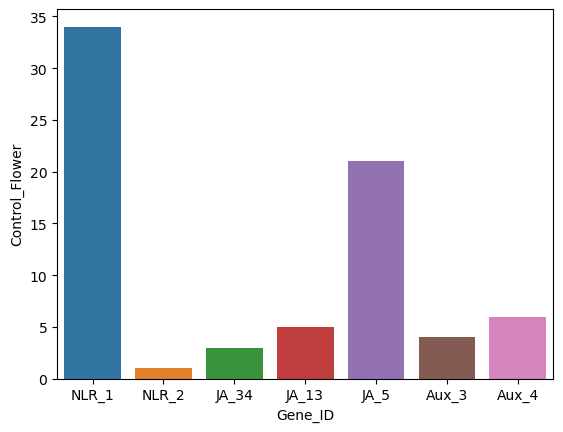

In [4]:
sns.barplot(x="Gene_ID", y="Control_Flower", data=df)

We could instead view the data by gene for each of the 6 samples.  
Transpose the dataframe (.T), 
Make a new column names from the first row  
Drop the first row  


In [6]:
df2 = df.T
df2.columns = df2.iloc[0]
df2 = df2[1:]

In [8]:
df2

Gene_ID,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Control_Flower,34,1,3,5,21,4,6
Control_Leaf,2,3,3,23,1,56,1
Control_Root,0.0,NaN,4.0,NaN,2.0,NaN,0.0
Infected_Flower,45,33,321,45,34,72,23
Infected_Leaf,23,12,45,23,13,34,65
Infected_Root,14,12,73,54,33,27,89


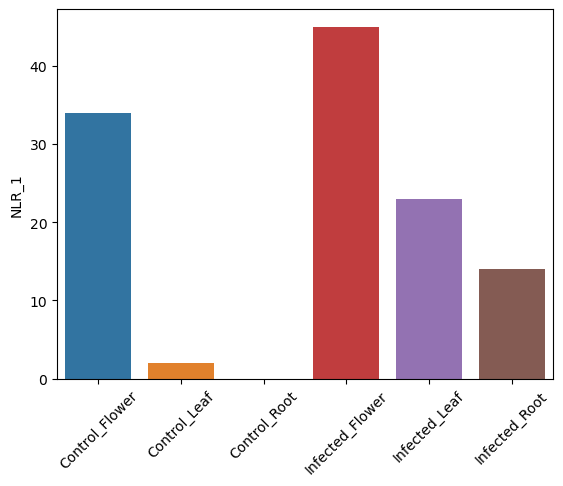

In [9]:
sns.barplot(x=df2.index, y="NLR_1", data=df2)
plt.xticks(rotation=45)
plt.show()

### Grouped data

But what if our focus is on infected and non-infected?  We have to do some juggling to get the datafarme in the right shape to plot useful graphs.  Here I am spliting a column in two, re-ordering the columns and grouping by Tissue and Disease.

In [10]:
df2['Disease'], df2['Tissue'] = zip(*df2.index.str.split('_').tolist())
df2 = df2[['Tissue', 'Disease','NLR_1', 'NLR_2', 'JA_34', 'JA_13', 'JA_5', 'Aux_3', 'Aux_4']]
df2 = df2.reset_index(drop=True)

<AxesSubplot:xlabel='Tissue', ylabel='NLR_1'>

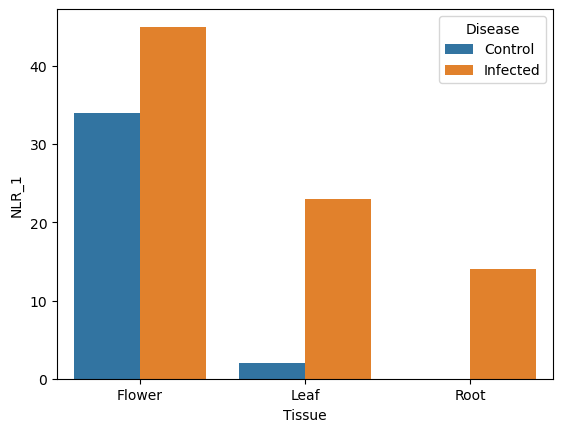

In [11]:
sns.barplot(x="Tissue", y="NLR_1", hue="Disease", data=df2)

In [12]:
df2

Gene_ID,Tissue,Disease,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
0,Flower,Control,34,1,3,5,21,4,6
1,Leaf,Control,2,3,3,23,1,56,1
2,Root,Control,0.0,NaN,4.0,NaN,2.0,NaN,0.0
3,Flower,Infected,45,33,321,45,34,72,23
4,Leaf,Infected,23,12,45,23,13,34,65
5,Root,Infected,14,12,73,54,33,27,89


The index here (0-5) isn't very infomative.  We can make the first two columns a multi-index, specifiying Tissue and Disease level, and making it easier to summarise the data.

In [13]:
df3 = df2.set_index(['Tissue', 'Disease'])
df3

,Gene_ID,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Tissue,Disease,,,,,,,
Flower,Control,34,1,3,5,21,4,6
Leaf,Control,2,3,3,23,1,56,1
Root,Control,0.0,NaN,4.0,NaN,2.0,NaN,0.0
Flower,Infected,45,33,321,45,34,72,23
Leaf,Infected,23,12,45,23,13,34,65
Root,Infected,14,12,73,54,33,27,89


We can examine the dataframe by either of these indexes, by name or by order of index, where 0 is the first index - 'Tissue' and 1 is the second index - 'Disease'

In [60]:
df3.groupby('Disease').mean()

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Disease,,,,,,,
Control,12.000000,2.0,3.333333,14.000000,8.000000,30.000000,2.333333
Infected,27.333333,19.0,146.333333,40.666667,26.666667,44.333333,59.000000


In [61]:
df3.groupby(level=0).mean()

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Tissue,,,,,,,
Flower,39.5,17.0,162.0,25.0,27.5,38.0,14.5
Leaf,12.5,7.5,24.0,23.0,7.0,45.0,33.0
Root,7.0,12.0,38.5,54.0,17.5,27.0,44.5


In [62]:
df3.groupby('Tissue').mean()

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Tissue,,,,,,,
Flower,39.5,17.0,162.0,25.0,27.5,38.0,14.5
Leaf,12.5,7.5,24.0,23.0,7.0,45.0,33.0
Root,7.0,12.0,38.5,54.0,17.5,27.0,44.5


In [64]:
df3.groupby('Disease').mean()

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Disease,,,,,,,
Control,12.000000,2.0,3.333333,14.000000,8.000000,30.000000,2.333333
Infected,27.333333,19.0,146.333333,40.666667,26.666667,44.333333,59.000000


In [63]:
df3.groupby(level=1).mean()

,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
Disease,,,,,,,
Control,12.000000,2.0,3.333333,14.000000,8.000000,30.000000,2.333333
Infected,27.333333,19.0,146.333333,40.666667,26.666667,44.333333,59.000000


What woudl be 'tidy data' format for this dataframe?

In [8]:
df2

,Tissue,Disease,NLR_1,NLR_2,JA_34,JA_13,JA_5,Aux_3,Aux_4
0,Flower,Control,34,1,3,5,21,4,6
1,Leaf,Control,2,3,3,23,1,56,1
2,Root,Control,0.0,NaN,4.0,NaN,2.0,NaN,0.0
3,Flower,Infected,45,33,321,45,34,72,23
4,Leaf,Infected,23,12,45,23,13,34,65
5,Root,Infected,14,12,73,54,33,27,89


This dataframe has 42 values:  
    
Gene, Disease states, and Tissues are variables  

    Tissues - three possible levels  
    Disease_state - 2 possible levels  
    Genes - 7 possible levels  
    
Samples of plant organs in different disease states are observations  
TPM counts are values 

To make this dataset tidy we need to arrange it with the Genes,  Disease and Tissue as column headers and the TMP values in rows.  Melt will allow as to do this, going form wide format to long format.  

Let's get a list of gene names to save having to type them

In [9]:
names = df.Gene_ID.tolist()

In [10]:
df3 = pd.melt(df2, id_vars=['Tissue','Disease'], value_vars= names, var_name='Gene_ID', value_name='TPM')
df3

,Tissue,Disease,Gene_ID,TPM
0,Flower,Control,NLR_1,34
1,Leaf,Control,NLR_1,2
2,Root,Control,NLR_1,0.0
3,Flower,Infected,NLR_1,45
4,Leaf,Infected,NLR_1,23
5,Root,Infected,NLR_1,14
6,Flower,Control,NLR_2,1
7,Leaf,Control,NLR_2,3
8,Root,Control,NLR_2,NaN
9,Flower,Infected,NLR_2,33


Now it's easy to plot the all the data by tissue

<AxesSubplot:xlabel='Tissue', ylabel='TPM'>

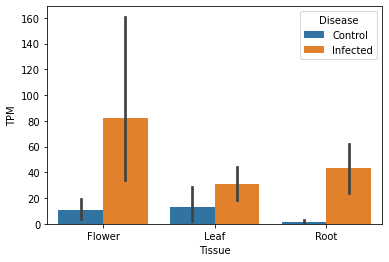

In [11]:
sns.barplot(x="Tissue", y="TPM", hue="Disease", data=df3)

Or break it down by gene

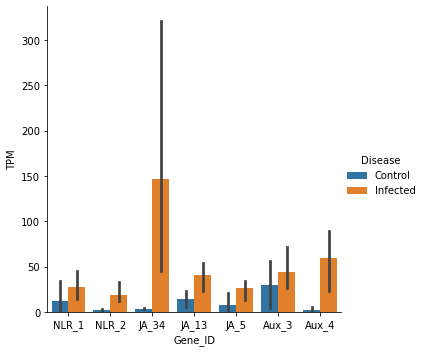

In [12]:
sns.catplot(x="Gene_ID", y="TPM", hue="Disease", data=df3, kind="bar")

or by gene

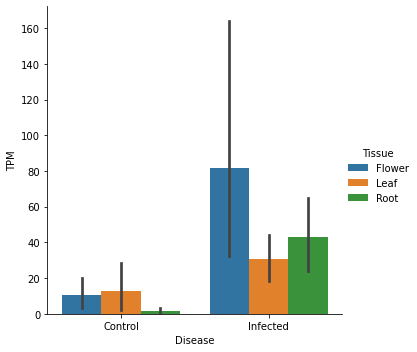

In [13]:
sns.catplot(x="Disease", y="TPM", hue="Tissue", data=df3, kind="bar")

or as individual plots by Organ type

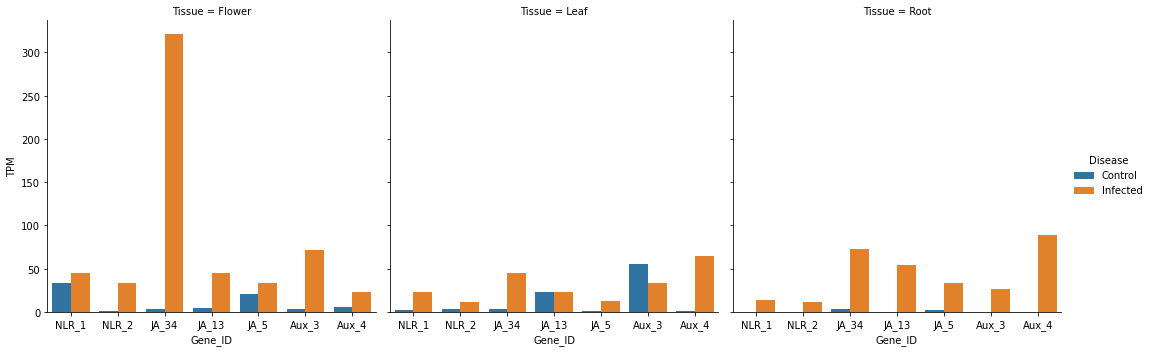

In [14]:
sns.catplot(x="Gene_ID", y="TPM", hue="Disease", data=df3, col='Tissue', kind="bar")